In [195]:
# Below I have found a data-set from 2003 which rates various aspects of a speed dating event. 
# I would like to use this to try and develop a system increase matches.


# First lets import the libraries. 

import numpy as np
import pandas as pd
import re, random
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
import seaborn as sns
from sklearn import cluster
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
pd.set_option('display.max_columns', 500)

In [2]:
# I wrote a function that takes a range in string format and returns a random number from that range.

In [35]:
def return_random_from_range(str_range):
    # Initialise an empty number list and range list.

    num_list = []
    range_list = []

    # First thing to do is strip the brackets and the dash with a simple regex.

    strip_string = re.sub(r"\W", " ", str_range)

    # Next lets get the two numbers into their own separate list.

    string_list = strip_string.split()

    # I can't operate on strings so lets cast to integer.

    for v in string_list:
        num_list.append(int(v))

    # I now need to take these two value and extrapolate the range.

    for c in range(num_list[0], num_list[1] + 1):
        range_list.append(c)

    # Lastly lets return a random number from the list.

    rand_int = random.choice(range_list)
    return rand_int


In [36]:
# I also needed another small function to divide a string value by 10. 

In [37]:
# There are a few different types being passed to this fucntion so I included some exceptions. 

In [38]:
def divide_string(s):
        if s is '?':
            return np.nan
        elif type(s) is float:
            num = s / 10.0
            return num
        elif type(s) is int:
            num = s / 10
            return num
        else:
            strip_string = re.sub(r"\W.*", "", s)
            i = float(strip_string)
            num = (i / 10.0)
            return num

In [39]:
# Also need a function to turn all my string values into floats.

In [40]:
def turn_to_float(string):
    if string == '?':
        return np.nan
    else:
        i_ret = float(string)
        return i_ret

In [41]:
# Function to remove question marks

In [42]:
def remove_q(s):
    if s == '?':
        return np.nan
    else:
        pass

In [43]:
# A function to shorten the race names to continent names. 

In [44]:
def race_to_continent(race):
    r = ''
    if race == "'Asian/Pacific Islander/Asian-American'":
        r = "Asian"
    elif race == 'European/Caucasian-American':
        r = "European"
    elif race == 'Other':
        r = "Other"
    elif race == "'Latino/Hispanic American'":
        r = "South American"
    elif race == "'Black/African American'":
        r = "African"
    elif race == '?':
        r = None
    return r

In [45]:
# Another mini function to turn zeros to NaN, this is for the age column.

In [46]:
# I only discovered this was an issue when I looked at the historgram.

In [47]:
def change_to_none(val):
    if val == 0.0:
        r = np.nan
        return r
    else:
        pass

In [48]:
# Right, lets load the data-set and get a quick look at the shape.

speed_date = pd.read_csv('speeddating.csv', low_memory=False)

In [4]:
speed_date.shape

(8378, 123)

In [5]:
# Lets also exmaine what coluns I have

for c in speed_date.columns:
    print(c)

has_null
wave
gender
age
age_o
d_age
d_d_age
race
race_o
samerace
importance_same_race
importance_same_religion
d_importance_same_race
d_importance_same_religion
field
pref_o_attractive
pref_o_sincere
pref_o_intelligence
pref_o_funny
pref_o_ambitious
pref_o_shared_interests
d_pref_o_attractive
d_pref_o_sincere
d_pref_o_intelligence
d_pref_o_funny
d_pref_o_ambitious
d_pref_o_shared_interests
attractive_o
sinsere_o
intelligence_o
funny_o
ambitous_o
shared_interests_o
d_attractive_o
d_sinsere_o
d_intelligence_o
d_funny_o
d_ambitous_o
d_shared_interests_o
attractive_important
sincere_important
intellicence_important
funny_important
ambtition_important
shared_interests_important
d_attractive_important
d_sincere_important
d_intellicence_important
d_funny_important
d_ambtition_important
d_shared_interests_important
attractive
sincere
intelligence
funny
ambition
d_attractive
d_sincere
d_intelligence
d_funny
d_ambition
attractive_partner
sincere_partner
intelligence_partner
funny_partner
ambiti

In [6]:
# Let's also have a look at the top five entires. 

speed_date.head(5)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,35,20,20,20,0,5,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6,8,8,8,8,6,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],6,9,7,7,6,5,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,60,0,0,40,0,0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,10,7,7,5,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],7,8,7,8,5,6,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,[2-5],[2-5],Law,19,18,19,18,14,12,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10,10,10,10,10,10,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],5,8,9,8,5,7,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,30,5,15,40,5,5,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,9,8,9,8,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],7,6,8,7,6,8,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10]

In [7]:
# First I'll rename all my columns to something more managable. 

In [8]:
# Lets rename them a small section at a time. 

speed_date = speed_date.rename(columns={'age_o': 'partner_age',
                                       'd_age': 'age_difference',
                                       'race_o': 'partner_race',
                                       'importance_same_race': 'race_importance',
                                       'importance_same_religion': 'religion_importance'})

In [9]:
speed_date = speed_date.rename(columns={'pref_o_attractive': 'part_pref_attr',
                                        'pref_o_sincere': 'part_pref_sinc',
                                        'pref_o_intelligence': 'part_pref_int',
                                        'pref_o_funny': 'part_pref_funny',
                                        'pref_o_ambitious': 'part_pref_amb',
                                        'pref_o_shared_interests': 'part_pref_shar'})

In [10]:
speed_date = speed_date.rename(columns={'d_attractive_important': 'you_pref_attr',
                                        'd_sincere_important': 'you_pref_sinc',
                                        'd_intellicence_important': 'you_pref_int',
                                        'd_funny_important': 'you_pref_funny',
                                        'd_ambtition_important': 'you_pref_amb',
                                        'd_shared_interests_important': 'you_pref_shar'})

In [11]:
# The rating column names are quite good so I'll leave them as they are. 

In [12]:
speed_date = speed_date.rename(columns={'d_expected_num_interested_in_me': 'how_many_into_me?',
                                        'd_expected_num_matches': 'how_many_matches?',
                                        'like': 'how_much_like?',
                                        'guess_prob_liked': 'prob_like_you?',
                                        'decision': 'your_decision?',
                                        'decision_o': 'their_decision?'})

In [13]:
# Quick sanity to check to make sure they did indeeed change. 

In [14]:
speed_date.head(10)

,has_null,wave,gender,age,partner_age,age_difference,d_d_age,race,partner_race,samerace,race_importance,religion_importance,d_importance_same_race,d_importance_same_religion,field,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,d_like,d_guess_prob_liked,met,your_decision?,their_decision?,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,35,20,20,20,0,5,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6,8,8,8,8,6,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],6,9,7,7,6,5,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,60,0,0,40,0,0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,10,7,7,5,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],7,8,7,8,5,6,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,[2-5],[2-5],Law,19,18,19,18,14,12,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10,10,10,10,10,10,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],5,8,9,8,5,7,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,30,5,15,40,5,5,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,9,8,9,8,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],7,6,8,7,6,8,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.61,[0.33-1],3,2,4,[0-4],[0-3],[3

In [15]:
# Cool, so all the columns I'm interested in have more meaningful names. 

In [16]:
# Lets create a baseline subset to work from. 

In [17]:
baseline_speed_date = pd.DataFrame(speed_date[['gender', 'age', 'partner_age',
                                              'age_difference', 'race', 'partner_race',
                                              'race_importance', 'religion_importance',
                                              'part_pref_attr', 'part_pref_sinc',
                                              'part_pref_int', 'part_pref_funny',
                                              'part_pref_amb', 'part_pref_shar',
                                              'you_pref_attr', 'you_pref_sinc',
                                              'you_pref_int', 'you_pref_funny',
                                              'you_pref_amb', 'you_pref_shar',
                                              'attractive_o', 'sinsere_o', 'intelligence_o',
                                              'funny_o', 'ambitous_o', 'shared_interests_o',
                                              'attractive', 'sincere', 'intelligence', 'funny',
                                              'ambition', 'attractive_partner', 'sincere_partner',
                                              'intelligence_partner', 'funny_partner', 'ambition_partner',
                                              'shared_interests_partner', 'how_many_into_me?',
                                              'how_many_matches?', 'how_much_like?', 'prob_like_you?',
                                              'your_decision?', 'their_decision?', 'match']])

In [18]:
# So now I have a baseline dataset to work with, containing the main columns I am interested in. 

In [19]:
# Let's grab a description. 

In [20]:
baseline_speed_date.describe()

,age_difference,your_decision?,their_decision?,match
count,8378.000000,8378.000000,8378.000000,8378.000000
mean,4.185605,0.419909,0.419551,0.164717
std,4.596171,0.493573,0.493515,0.370947
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,1.000000,0.000000
max,37.000000,1.000000,1.000000,1.000000


In [21]:
# Looks a bit weird, lets have a look at the head instead

In [22]:
baseline_speed_date.head(10)

,gender,age,partner_age,age_difference,race,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match
0,female,21,27,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,35,20,20,20,0,5,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,8,6,6,8,8,8,7,6,9,7,7,6,5,[0-3],[3-5],7,6,1,0,0
1,female,21,22,1,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,60,0,0,40,0,0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],7,8,10,7,7,5,6,8,8,8,7,7,8,7,8,5,6,[0-3],[3-5],7,5,1,0,0
2,female,21,22,1,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',2,4,19,18,19,18,14,12,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],10,10,10,10,10,10,6,8,8,8,7,5,8,9,8,5,7,[0-3],[3-5],7,?,1,1,1
3,female,21,23,2,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,30,5,15,40,5,5,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],7,8,9,8,9,8,6,8,8,8,7,7,6,8,7,6,8,[0-3],[3-5],7,6,1,1,1
4,female,21,24,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',2,4,30,10,20,10,10,20,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],8,7,9,6,9,7,6,8,8,8,7,5,6,7,7,6,6,[0-3],[3-5],6,6,1,1,1
5,female,21,25,4,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,50,0,30,10,0,10,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],7,7,8,8,7,7,6,8,8,8,7,4,9,7,4,6,4,[0-3],[3-5],6,5,0,1,0
6,female,21,30,9,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,35,15,25,10,5,10,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],3,6,7,5,8,7,6,8,8,8,7,7,6,7,4,6,7,[0-3],[3-5],6,5,1,0,0
7,female,21,27,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,33.33,11.11,11.11,11.11,11.11,22.22,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,7,5,6,8,6,6,8,8,8,7,4,9,7,6,5,6,[0-3],[3-5],6,7,0,0,0
8,female,21,28,7,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,50,0,25,10,0,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],7,7,8,8,8,9,6,8,8,8,7,7,6,8,9,8,8,[0-3],[3-5],7,7,1,1,1
9,female,21,24,3,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,100,0,0,0,0,0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,6,6,6,6,6,6,8,8,8,7,5,6,6,8,10,8,[0-3],[3-5],6,6,1,0,0


In [23]:
# Ok so my data needs a number of transformations. 

In [25]:
# Some cells have a continuous range rating, so I will get a random number within the range. 

In [26]:
# Also because some of the data is between 1 and 100 I will need to divide those by ten to keep it to scale.

In [27]:
# I need a look at the range values to see how big the range is. 

for v in baseline_speed_date['you_pref_attr']:
    print(v)

[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[1

[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[16-20]
[16-20]


[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[

[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[0-15]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[21-100]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[16-20]
[

In [28]:
# With such a strange set of ranges I tried to find more information on the data-set.

In [29]:
# I couldn't find any further information.

In [30]:
# As mentioned, for now, I'll assume the chosen value is within the range and will take a random value. 

In [31]:
# I also need to check what type of data I have in this field. 

In [32]:
for v in baseline_speed_date['you_pref_attr']:
    print(type(v))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [33]:
# Cool, all strings, so now I use the .apply method with my median_from_string() function. 

In [49]:
you_pref_list = ['you_pref_attr', 'you_pref_sinc',
                'you_pref_int', 'you_pref_funny',
                'you_pref_amb', 'you_pref_shar',
                'how_many_into_me?', 'how_many_matches?']

for at in you_pref_list:
    baseline_speed_date[at] = baseline_speed_date[at].apply(return_random_from_range)


In [50]:
# Quick sanity check. 

In [51]:
baseline_speed_date.head(10)

,gender,age,partner_age,age_difference,race,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match
0,female,21,27,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,35,20,20,20,0,5,11,17,16,8,6,2,6,8,8,8,8,6,6,8,8,8,7,6,9,7,7,6,5,2,3,7,6,1,0,0
1,female,21,22,1,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,60,0,0,40,0,0,1,16,17,15,6,9,7,8,10,7,7,5,6,8,8,8,7,7,8,7,8,5,6,0,5,7,5,1,0,0
2,female,21,22,1,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',2,4,19,18,19,18,14,12,9,19,18,0,0,15,10,10,10,10,10,10,6,8,8,8,7,5,8,9,8,5,7,2,4,7,?,1,1,1
3,female,21,23,2,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,30,5,15,40,5,5,4,16,16,6,14,6,7,8,9,8,9,8,6,8,8,8,7,7,6,8,7,6,8,0,5,7,6,1,1,1
4,female,21,24,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',2,4,30,10,20,10,10,20,14,20,16,15,13,10,8,7,9,6,9,7,6,8,8,8,7,5,6,7,7,6,6,0,4,6,6,1,1,1
5,female,21,25,4,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,50,0,30,10,0,10,13,16,19,3,9,1,7,7,8,8,7,7,6,8,8,8,7,4,9,7,4,6,4,0,5,6,5,0,1,0
6,female,21,30,9,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,35,15,25,10,5,10,11,16,16,5,10,1,3,6,7,5,8,7,6,8,8,8,7,7,6,7,4,6,7,3,3,6,5,1,0,0
7,female,21,27,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,33.33,11.11,11.11,11.11,11.11,22.22,1,20,20,7,0,5,6,7,5,6,8,6,6,8,8,8,7,4,9,7,6,5,6,1,3,6,7,0,0,0
8,female,21,28,7,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,50,0,25,10,0,15,15,18,20,9,3,10,7,7,8,8,8,9,6,8,8,8,7,7,6,8,9,8,8,1,4,7,7,1,1,1
9,female,21,24,3,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,100,0,0,0,0,0,10,18,19,14,12,12,6,6,6,6,6,6,6,8,8,8,7,5,6,6,8,10,8,3,4,6,6,1,0,0


In [52]:
# Quality, next thing to take care of is having all my numbers relative to each other. 

In [54]:
# Seen as I took a range value between 0-100 I'll divide by 10. 

In [55]:
# By diving through by 10 we bring these values in line with the rest of the data-set.

In [56]:
# This gets all ratings values between 0 and 10

In [57]:
part_pref_list = ['part_pref_attr', 'part_pref_sinc',
                 'part_pref_int', 'part_pref_funny',
                 'part_pref_amb', 'part_pref_shar']
for at in part_pref_list:
    baseline_speed_date[at] = baseline_speed_date[at].apply(divide_string)


In [58]:
you_pref = ['you_pref_attr', 'you_pref_sinc',
           'you_pref_int', 'you_pref_funny',
           'you_pref_amb', 'you_pref_shar']
for at in you_pref:
    baseline_speed_date[at] = baseline_speed_date[at].apply(divide_string)

In [59]:
# And make sure I've not went crazy. 

In [60]:
baseline_speed_date.head(10)

,gender,age,partner_age,age_difference,race,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match
0,female,21,27,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,3.5,2.0,2.0,2.0,0.0,0.5,1.1,1.7,1.6,0.8,0.6,0.2,6,8,8,8,8,6,6,8,8,8,7,6,9,7,7,6,5,2,3,7,6,1,0,0
1,female,21,22,1,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,6.0,0.0,0.0,4.0,0.0,0.0,0.1,1.6,1.7,1.5,0.6,0.9,7,8,10,7,7,5,6,8,8,8,7,7,8,7,8,5,6,0,5,7,5,1,0,0
2,female,21,22,1,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',2,4,1.9,1.8,1.9,1.8,1.4,1.2,0.9,1.9,1.8,0.0,0.0,1.5,10,10,10,10,10,10,6,8,8,8,7,5,8,9,8,5,7,2,4,7,?,1,1,1
3,female,21,23,2,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,3.0,0.5,1.5,4.0,0.5,0.5,0.4,1.6,1.6,0.6,1.4,0.6,7,8,9,8,9,8,6,8,8,8,7,7,6,8,7,6,8,0,5,7,6,1,1,1
4,female,21,24,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',2,4,3.0,1.0,2.0,1.0,1.0,2.0,1.4,2.0,1.6,1.5,1.3,1.0,8,7,9,6,9,7,6,8,8,8,7,5,6,7,7,6,6,0,4,6,6,1,1,1
5,female,21,25,4,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,5.0,0.0,3.0,1.0,0.0,1.0,1.3,1.6,1.9,0.3,0.9,0.1,7,7,8,8,7,7,6,8,8,8,7,4,9,7,4,6,4,0,5,6,5,0,1,0
6,female,21,30,9,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,3.5,1.5,2.5,1.0,0.5,1.0,1.1,1.6,1.6,0.5,1.0,0.1,3,6,7,5,8,7,6,8,8,8,7,7,6,7,4,6,7,3,3,6,5,1,0,0
7,female,21,27,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,3.3,1.1,1.1,1.1,1.1,2.2,0.1,2.0,2.0,0.7,0.0,0.5,6,7,5,6,8,6,6,8,8,8,7,4,9,7,6,5,6,1,3,6,7,0,0,0
8,female,21,28,7,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,5.0,0.0,2.5,1.0,0.0,1.5,1.5,1.8,2.0,0.9,0.3,1.0,7,7,8,8,8,9,6,8,8,8,7,7,6,8,9,8,8,1,4,7,7,1,1,1
9,female,21,24,3,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,10.0,0.0,0.0,0.0,0.0,0.0,1.0,1.8,1.9,1.4,1.2,1.2,6,6,6,6,6,6,6,8,8,8,7,5,6,6,8,10,8,3,4,6,6,1,0,0


In [61]:
# Cool! So I almost have all data in a format ready to describe and visualise. 

In [62]:
for c in baseline_speed_date.columns:
    print(f"Description of: {c}.\n")
    print(baseline_speed_date[c].describe())
    print('--------------------\n')

Description of: gender.

count     8378
unique       2
top       male
freq      4194
Name: gender, dtype: object
--------------------

Description of: age.

count     8378
unique      25
top         27
freq      1059
Name: age, dtype: object
--------------------

Description of: partner_age.

count     8378
unique      25
top         27
freq      1059
Name: partner_age, dtype: object
--------------------

Description of: age_difference.

count    8378.000000
mean        4.185605
std         4.596171
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        37.000000
Name: age_difference, dtype: float64
--------------------

Description of: race.

count                            8378
unique                              6
top       European/Caucasian-American
freq                             4727
Name: race, dtype: object
--------------------

Description of: partner_race.

count                            8378
unique                              6
t

In [63]:
# Another key peice of information has came up. A lot of my descriptions don't include mean, median etc...

# Let's examine the different types of data for each variable. 

In [64]:
types = baseline_speed_date.dtypes
print(types)

gender                       object
age                          object
partner_age                  object
age_difference                int64
race                         object
partner_race                 object
race_importance              object
religion_importance          object
part_pref_attr              float64
part_pref_sinc              float64
part_pref_int               float64
part_pref_funny             float64
part_pref_amb               float64
part_pref_shar              float64
you_pref_attr               float64
you_pref_sinc               float64
you_pref_int                float64
you_pref_funny              float64
you_pref_amb                float64
you_pref_shar               float64
attractive_o                 object
sinsere_o                    object
intelligence_o               object
funny_o                      object
ambitous_o                   object
shared_interests_o           object
attractive                   object
sincere                     

In [65]:
# Okey dokey, so a lot of my data needs a further transformation. 

# From the output it looks like our numerical data is represented as a string.

In [66]:
# Lets apply the turn_to_float() function. 

In [67]:

baseline_speed_date['race_importance'] = baseline_speed_date['race_importance'].apply(turn_to_float)
baseline_speed_date['age'] = baseline_speed_date['age'].apply(turn_to_float)
baseline_speed_date['age_difference'] = baseline_speed_date['age_difference'].apply(turn_to_float)
baseline_speed_date['partner_age'] = baseline_speed_date['partner_age'].apply(turn_to_float)
baseline_speed_date['religion_importance'] = baseline_speed_date['religion_importance'].apply(turn_to_float)
baseline_speed_date['part_pref_sinc'] = baseline_speed_date['part_pref_sinc'].apply(turn_to_float)
baseline_speed_date['part_pref_int'] = baseline_speed_date['part_pref_int'].apply(turn_to_float)
baseline_speed_date['part_pref_funny'] = baseline_speed_date['part_pref_funny'].apply(turn_to_float)
baseline_speed_date['part_pref_amb'] = baseline_speed_date['part_pref_amb'].apply(turn_to_float)
baseline_speed_date['part_pref_shar'] = baseline_speed_date['part_pref_shar'].apply(turn_to_float)
baseline_speed_date['attractive_o'] = baseline_speed_date['attractive_o'].apply(turn_to_float)
baseline_speed_date['sinsere_o'] = baseline_speed_date['sinsere_o'].apply(turn_to_float)
baseline_speed_date['intelligence_o'] = baseline_speed_date['intelligence_o'].apply(turn_to_float)
baseline_speed_date['funny_o'] = baseline_speed_date['funny_o'].apply(turn_to_float)
baseline_speed_date['ambitous_o'] = baseline_speed_date['ambitous_o'].apply(turn_to_float)
baseline_speed_date['shared_interests_o'] = baseline_speed_date['shared_interests_o'].apply(turn_to_float)
baseline_speed_date['attractive'] = baseline_speed_date['attractive'].apply(turn_to_float)
baseline_speed_date['sincere'] = baseline_speed_date['sincere'].apply(turn_to_float)
baseline_speed_date['intelligence'] = baseline_speed_date['intelligence'].apply(turn_to_float)
baseline_speed_date['funny'] = baseline_speed_date['funny'].apply(turn_to_float)
baseline_speed_date['ambition'] = baseline_speed_date['ambition'].apply(turn_to_float)
baseline_speed_date['attractive_partner'] = baseline_speed_date['attractive_partner'].apply(turn_to_float)
baseline_speed_date['intelligence_partner'] = baseline_speed_date['intelligence_partner'].apply(turn_to_float)
baseline_speed_date['funny_partner'] = baseline_speed_date['funny_partner'].apply(turn_to_float)
baseline_speed_date['ambition_partner'] = baseline_speed_date['ambition_partner'].apply(turn_to_float)
baseline_speed_date['shared_interests_partner'] = baseline_speed_date['shared_interests_partner'].apply(turn_to_float)
baseline_speed_date['how_much_like?'] = baseline_speed_date['how_much_like?'].apply(turn_to_float)
baseline_speed_date['prob_like_you?'] = baseline_speed_date['prob_like_you?'].apply(turn_to_float)
baseline_speed_date['attractive_o'] = baseline_speed_date['attractive_o'].apply(turn_to_float)
baseline_speed_date['sincere_partner'] = baseline_speed_date['sincere_partner'].apply(turn_to_float)


In [68]:
# After applying my function any non-numerical strings were transformed to NaN. 

In [69]:
baseline_speed_date.head(10)

,gender,age,partner_age,age_difference,race,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match
0,female,21.0,27.0,6.0,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2.0,4.0,3.5,2.0,2.0,2.0,0.0,0.5,1.1,1.7,1.6,0.8,0.6,0.2,6.0,8.0,8.0,8.0,8.0,6.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,2,3,7.0,6.0,1,0,0
1,female,21.0,22.0,1.0,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2.0,4.0,6.0,0.0,0.0,4.0,0.0,0.0,0.1,1.6,1.7,1.5,0.6,0.9,7.0,8.0,10.0,7.0,7.0,5.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,0,5,7.0,5.0,1,0,0
2,female,21.0,22.0,1.0,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',2.0,4.0,1.9,1.8,1.9,1.8,1.4,1.2,0.9,1.9,1.8,0.0,0.0,1.5,10.0,10.0,10.0,10.0,10.0,10.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,2,4,7.0,NaN,1,1,1
3,female,21.0,23.0,2.0,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2.0,4.0,3.0,0.5,1.5,4.0,0.5,0.5,0.4,1.6,1.6,0.6,1.4,0.6,7.0,8.0,9.0,8.0,9.0,8.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,0,5,7.0,6.0,1,1,1
4,female,21.0,24.0,3.0,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',2.0,4.0,3.0,1.0,2.0,1.0,1.0,2.0,1.4,2.0,1.6,1.5,1.3,1.0,8.0,7.0,9.0,6.0,9.0,7.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,0,4,6.0,6.0,1,1,1
5,female,21.0,25.0,4.0,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2.0,4.0,5.0,0.0,3.0,1.0,0.0,1.0,1.3,1.6,1.9,0.3,0.9,0.1,7.0,7.0,8.0,8.0,7.0,7.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,6.0,4.0,0,5,6.0,5.0,0,1,0
6,female,21.0,30.0,9.0,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2.0,4.0,3.5,1.5,2.5,1.0,0.5,1.0,1.1,1.6,1.6,0.5,1.0,0.1,3.0,6.0,7.0,5.0,8.0,7.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,7.0,4.0,6.0,7.0,3,3,6.0,5.0,1,0,0
7,female,21.0,27.0,6.0,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2.0,4.0,3.3,1.1,1.1,1.1,1.1,2.2,0.1,2.0,2.0,0.7,0.0,0.5,6.0,7.0,5.0,6.0,8.0,6.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,6.0,5.0,6.0,1,3,6.0,7.0,0,0,0
8,female,21.0,28.0,7.0,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2.0,4.0,5.0,0.0,2.5,1.0,0.0,1.5,1.5,1.8,2.0,0.9,0.3,1.0,7.0,7.0,8.0,8.0,8.0,9.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,9.0,8.0,8.0,1,4,7.0,7.0,1,1,1
9,female,21.0,24.0,3.0,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,1.8,1.9,1.4,1.2,1.2,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,6.0,8.0,10.0,8.0,3,4,6.0,6.0,1,0,0


In [70]:
# I should now be able to get a better description of all my variables. 

baseline_speed_date['partner_age'].describe()

count    8274.000000
mean       26.364999
std         3.563648
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: partner_age, dtype: float64

In [71]:
for c in baseline_speed_date.columns:
    print(f"Describing {c}\n")
    print(baseline_speed_date[c].describe())
    print("---------------\n")


Describing gender

count     8378
unique       2
top       male
freq      4194
Name: gender, dtype: object
---------------

Describing age

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64
---------------

Describing partner_age

count    8274.000000
mean       26.364999
std         3.563648
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: partner_age, dtype: float64
---------------

Describing age_difference

count    8378.000000
mean        4.185605
std         4.596171
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        37.000000
Name: age_difference, dtype: float64
---------------

Describing race

count                            8378
unique                              6
top       European/Caucasian-American
freq                      

In [72]:
# Nice! Next lets see how many unique values we have in the race column. 

baseline_speed_date.race.unique()

array(["'Asian/Pacific Islander/Asian-American'",
       'European/Caucasian-American', 'Other',
       "'Latino/Hispanic American'", "'Black/African American'", '?'],
      dtype=object)

In [73]:
# Ok, so a few changes I still want to make. I need to shorten the values in the race column for readability.

# I also want to add a "yes/no" match column. 

In [74]:
# Let's create the match column first. We will take a 0 as "no" and a 1 as "yes".

match = []
for v in baseline_speed_date['match']:
    if v == 0:
        match.append('no')
    else:
        match.append('yes')
baseline_speed_date['match (yes/no)'] = match

In [75]:
# Lets check it added. 

In [76]:
baseline_speed_date['match (yes/no)']

0        no
1        no
2       yes
3       yes
4       yes
       ... 
8373     no
8374     no
8375     no
8376     no
8377     no
Name: match (yes/no), Length: 8378, dtype: object

In [77]:
# Good, lets shorten the values in the race variable now. Please note this is purely for readability. 

In [78]:
baseline_speed_date['race'] = baseline_speed_date['race'].apply(race_to_continent)
baseline_speed_date['partner_race'] = baseline_speed_date['partner_race'].apply(race_to_continent)

In [79]:
# And a final sanity check. 

In [80]:
baseline_speed_date.tail(30)

,gender,age,partner_age,age_difference,race,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match,match (yes/no)
8348,male,27.0,27.0,0.0,African,Asian,2.0,1.0,1.0,2.5,2.0,2.0,0.5,2.0,6.3,2.0,1.8,1.8,0.4,0.8,8.0,5.0,7.0,10.0,7.0,8.0,7.0,8.0,3.0,8.0,5.0,4.0,8.0,7.0,7.0,6.0,5.0,2,4,8.0,7.0,0,1,0,no
8349,male,27.0,25.0,2.0,African,Asian,2.0,1.0,1.5,2.0,2.5,2.0,1.0,1.0,8.5,2.0,1.8,1.9,0.4,0.6,6.0,9.0,8.0,6.0,7.0,7.0,7.0,8.0,3.0,8.0,5.0,6.0,7.0,7.0,6.0,9.0,5.0,1,5,7.0,1.0,0,1,0,no
8350,male,27.0,24.0,3.0,African,European,2.0,1.0,1.0,1.5,3.0,2.0,1.5,1.0,2.4,1.8,1.9,1.8,0.5,1.1,8.0,8.0,9.0,7.0,8.0,7.0,7.0,8.0,3.0,8.0,5.0,5.0,7.0,8.0,5.0,6.0,5.0,1,3,6.0,7.0,0,1,0,no
8351,male,27.0,26.0,1.0,African,South American,2.0,1.0,1.0,1.0,3.0,2.0,1.0,1.5,6.9,2.0,1.7,1.6,1.0,1.2,10.0,5.0,8.0,6.0,9.0,8.0,7.0,8.0,3.0,8.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,1,4,8.0,1.0,0,1,0,no
8352,male,27.0,24.0,3.0,African,Other,2.0,1.0,5.0,2.0,1.0,0.5,1.0,0.5,9.4,1.9,1.8,1.8,0.3,1.4,7.0,7.0,8.0,8.0,8.0,4.0,7.0,8.0,3.0,8.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,3,5,6.0,1.0,0,0,0,no
8353,male,27.0,29.0,2.0,African,South American,2.0,1.0,4.0,1.0,3.0,1.0,1.0,NaN,9.9,1.8,1.8,1.8,0.8,0.7,6.0,7.0,7.0,6.0,6.0,5.0,7.0,8.0,3.0,8.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,1,3,9.0,1.0,0,1,0,no
8354,male,27.0,22.0,5.0,African,Asian,2.0,1.0,1.0,2.5,2.5,1.0,1.0,2.0,2.2,1.7,1.6,1.6,0.8,0.8,5.0,7.0,5.0,4.0,4.0,4.0,7.0,8.0,3.0,8.0,5.0,5.0,10.0,10.0,8.0,6.0,5.0,1,5,8.0,5.0,0,1,0,no
8355,male,27.0,22.0,5.0,African,Asian,2.0,1.0,2.0,2.0,1.0,1.5,0.5,3.0,5.2,1.9,1.7,1.6,1.1,0.4,6.0,8.0,7.0,6.0,6.0,6.0,7.0,8.0,3.0,8.0,5.0,4.0,9.0,9.0,7.0,7.0,6.0,3,5,7.0,5.0,0,0,0,no
8356,male,25.0,28.0,3.0,European,Asian,1.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0,3.7,1.1,1.1,0.0,1.5,1.2,8.0,4.0,NaN,8.0,8.0,2.0,8.0,7.0,6.0,7.0,7.0,7.0,7.0,9.0,8.0,9.0,7.0,0,5,8.0,5.0,1,1,1,yes
8357,male,25.0,26.0,1.0,European,South American,1.0,1.0,2.5,2.5,2.5,1.2,0.3,1.0,3.4,0.5,1.0,0.1,1.1,1.3,10.0,9.0,9.0,8.0,7.0,NaN,8.0,7.0,6.0,7.0,7.0,9.0,9.0,9.0,9.0,NaN,7.0,0,4,9.0,8.0,1,1,1,yes


In [82]:
# Data now fully cleaned! Ready for basic visualisation, PCA, unsupervised clustering and SVM. 

In [83]:
# Lets check the changes and see my unique race values. 

r = baseline_speed_date['race'].unique()
print(r)

['Asian' 'European' 'Other' 'South American' 'African' None]


In [84]:
# Ok, time to start exploring the data through visualisation. 

In [85]:
# To get warmed up lets look at the variance in the race category. 

In [86]:
# First I need to get the frequency of each race. 

In [87]:
r = baseline_speed_date.groupby('race').count()
r

,gender,age,partner_age,age_difference,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match,match (yes/no)
race,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
African,420,420,414,420,416,420,420,414,414,414,413,412,411,420,420,420,420,420,420,411,412,409,409,393,376,420,420,420,420,420,408,389,391,385,375,362,420,420,391,388,420,420,420,420
Asian,1982,1982,1959,1982,1966,1982,1982,1962,1962,1962,1962,1962,1955,1982,1982,1982,1982,1982,1982,1932,1909,1905,1889,1821,1740,1982,1982,1982,1982,1982,1944,1930,1943,1937,1852,1763,1982,1982,1937,1915,1982,1982,1982,1982
European,4727,4695,4669,4727,4687,4711,4711,4677,4677,4677,4672,4667,4654,4727,4727,4727,4727,4727,4727,4609,4566,4555,4527,4290,4090,4693,4693,4693,4693,4693,4611,4570,4540,4503,4290,4103,4727,4727,4603,4557,4727,4727,4727,4727
Other,522,522,514,522,516,522,522,516,516,516,515,514,513,522,522,522,522,522,522,512,509,509,501,482,463,522,522,522,522,522,509,509,508,509,484,464,522,522,505,508,522,522,522,522
South American,664,664,655,664,657,664,664,657,657,657,655,653,653,664,664,664,664,664,664,646,642,640,638,618,580,656,656,656,656,656,648,647,644,638,610,563,664,664,646,646,664,664,664,664


In [88]:
# Next lets initilise all our plot info and show it!  

# Using rcParams to add some styling to the output. 

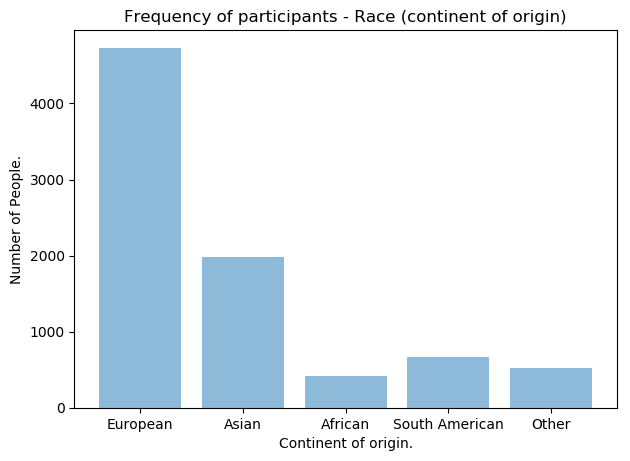

In [89]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
buckets = ('European', 'Asian', 'African', 'South American', 'Other')
y_pos = np.arange(len(buckets))
values = [4727, 1982, 420, 664, 522]
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, buckets)
plt.ylabel('Number of People.')
plt.xlabel('Continent of origin.')
plt.title('Frequency of participants - Race (continent of origin)')
plt.show()


In [90]:
# So we can clearly see a huge imbalance in Europeans. I wonder what proportion are male and female. 

In [91]:
gender_groups = baseline_speed_date.groupby(['gender'])

In [92]:
# Quick sanity check to make sure i do just have the two groups. 

In [93]:
len(gender_groups)

2

In [94]:
# Great, lets now put the groups into seperate variables.

In [95]:
males = gender_groups.get_group('male')
females = gender_groups.get_group('female')

In [96]:
# Cool, so now I just repeat the process I went through for the races as a whole. 

In [97]:
males.groupby('race').count()

,gender,age,partner_age,age_difference,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match,match (yes/no)
race,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
African,179,179,176,179,177,179,179,175,175,175,175,175,174,179,179,179,179,179,179,178,178,177,177,172,160,179,179,179,179,179,172,161,160,163,155,150,179,179,174,171,179,179,179,179
Asian,937,937,920,937,927,937,937,923,923,923,923,923,916,937,937,937,937,937,937,909,900,899,888,863,804,937,937,937,937,937,919,916,917,913,884,832,937,937,914,892,937,937,937,937
European,2520,2510,2477,2520,2490,2520,2520,2480,2480,2480,2480,2480,2467,2520,2520,2520,2520,2520,2520,2449,2434,2420,2399,2270,2158,2502,2502,2502,2502,2502,2454,2423,2423,2405,2288,2227,2520,2520,2458,2442,2520,2520,2520,2520
Other,277,277,270,277,271,277,277,271,271,271,271,271,270,277,277,277,277,277,277,271,270,269,266,253,242,277,277,277,277,277,270,270,269,270,254,246,277,277,268,269,277,277,277,277
South American,261,261,256,261,256,261,261,256,256,256,256,256,256,261,261,261,261,261,261,257,255,253,252,247,226,261,261,261,261,261,258,257,256,256,243,228,261,261,255,255,261,261,261,261


In [98]:
f_group = females.groupby('race').count()
f_group

,gender,age,partner_age,age_difference,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match,match (yes/no)
race,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
African,241,241,238,241,239,241,241,239,239,239,238,237,237,241,241,241,241,241,241,233,234,232,232,221,216,241,241,241,241,241,236,228,231,222,220,212,241,241,217,217,241,241,241,241
Asian,1045,1045,1039,1045,1039,1045,1045,1039,1039,1039,1039,1039,1039,1045,1045,1045,1045,1045,1045,1023,1009,1006,1001,958,936,1045,1045,1045,1045,1045,1025,1014,1026,1024,968,931,1045,1045,1023,1023,1045,1045,1045,1045
European,2207,2185,2192,2207,2197,2191,2191,2197,2197,2197,2192,2187,2187,2207,2207,2207,2207,2207,2207,2160,2132,2135,2128,2020,1932,2191,2191,2191,2191,2191,2157,2147,2117,2098,2002,1876,2207,2207,2145,2115,2207,2207,2207,2207
Other,245,245,244,245,245,245,245,245,245,245,244,243,243,245,245,245,245,245,245,241,239,240,235,229,221,245,245,245,245,245,239,239,239,239,230,218,245,245,237,239,245,245,245,245
South American,403,403,399,403,401,403,403,401,401,401,399,397,397,403,403,403,403,403,403,389,387,387,386,371,354,395,395,395,395,395,390,390,388,382,367,335,403,403,391,391,403,403,403,403


In [101]:
# Plotting the female frequency of race first. 

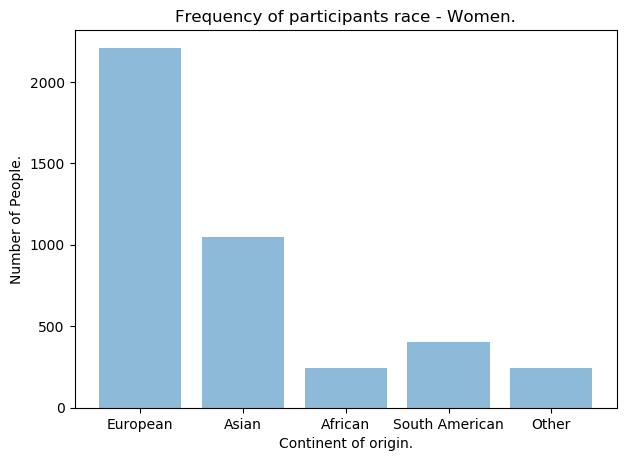

In [102]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
buckets = ('European', 'Asian', 'African', 'South American', 'Other')
y_pos = np.arange(len(buckets))
values = [2207, 1045, 241, 403, 245]
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, buckets)
plt.ylabel('Number of People.')
plt.xlabel('Continent of origin.')
plt.title('Frequency of participants race - Women.')
plt.show()

In [103]:
# Now Plotting the men. 

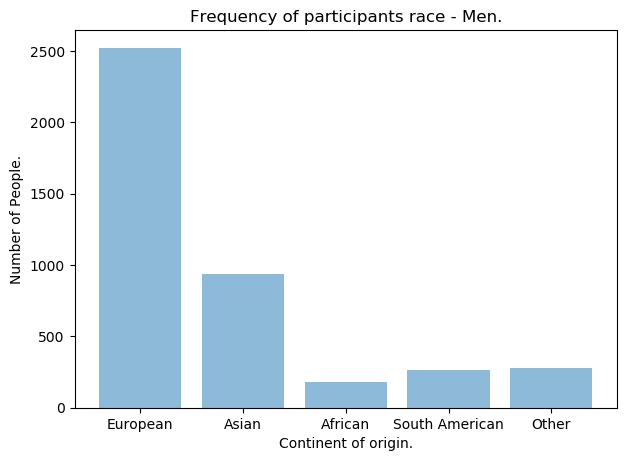

In [104]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
buckets = ('European', 'Asian', 'African', 'South American', 'Other')
y_pos = np.arange(len(buckets))
values = [2520, 937, 179, 261, 277]
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, buckets)
plt.ylabel('Number of People.')
plt.xlabel('Continent of origin.')
plt.title('Frequency of participants race - Men.')
plt.show()

In [105]:
# So its clear to see from our bar charts that people of African heritage are massivly under-represented. 

In [106]:
# South-American women would also fall into this 'massively under-represented' category. 

In [107]:
# Let's check out the distribution of ages. 

In [108]:
# First lets grab 'ages' as its own Series.

In [109]:
ages = baseline_speed_date['age']

In [110]:
# Sanity check

ages

0       21.0
1       21.0
2       21.0
3       21.0
4       21.0
        ... 
8373    25.0
8374    25.0
8375    25.0
8376    25.0
8377    25.0
Name: age, Length: 8378, dtype: float64

In [111]:
# Cool, so lets use matplotlib to check out the distrbution.

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


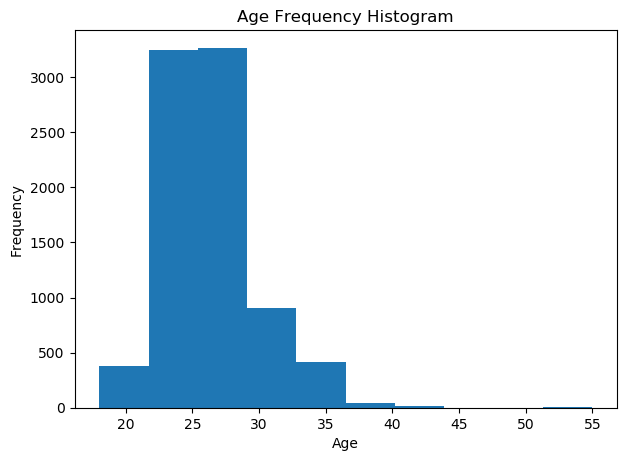

In [112]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(ages)
plt.gca().set(title='Age Frequency Histogram', ylabel='Frequency', xlabel='Age')
plt.show()

In [113]:
# That looks like a pretty regular distribution

In [114]:
ages.describe()

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

In [115]:
age_diff = baseline_speed_date['age_difference']
age_diff.describe()

count    8378.000000
mean        4.185605
std         4.596171
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        37.000000
Name: age_difference, dtype: float64

In [116]:
# Excellent, that makes sense, the minimum age is 18. 

In [117]:
# Our distrubution is right hand skewed.

In [118]:
# As an excercise lets also have a look at these ages a a boxplot. 

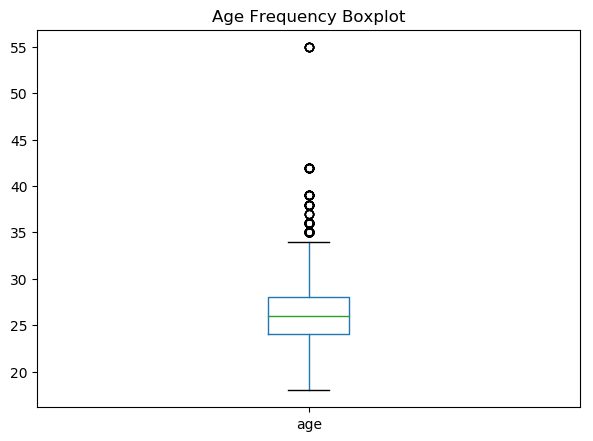

In [119]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
ages.plot(kind='box')
plt.title('Age Frequency Boxplot')
plt.show()

In [120]:
# So actually this reflects the histogram in that the bulk of my ages are in their twenties. 

# However with a boxplot view it's much easier to spot my outliers. 

In [121]:
# The outliers actually start around the age of 35. 

In [122]:
# I love a density plot, so lets have one of those as well! :) 

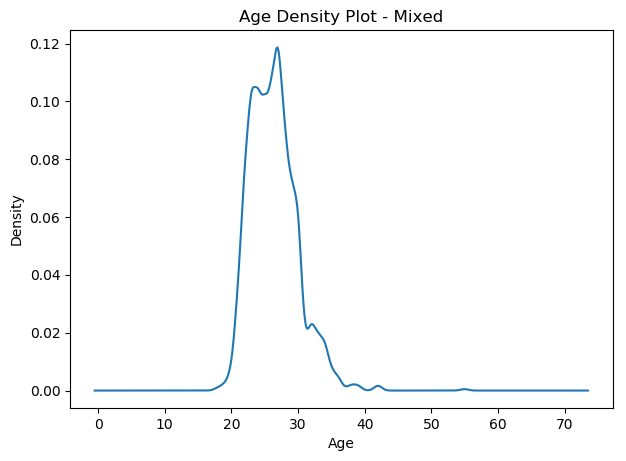

In [123]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
baseline_speed_date['age'].plot.density()
plt.title('Age Density Plot - Mixed')
plt.xlabel('Age')
plt.show()

In [124]:
# Exaclty as expected, but with even more info, i can see mini peaks between the ages now. :)

In [125]:
# Cool so next I want an idea of how many people said 'yes' and how many said 'no'. 

In [126]:
# I can grab the basic data just like above and then graph it up! 

In [127]:
matches = baseline_speed_date['match']

In [128]:
baseline_speed_date.groupby('match').count()

,gender,age,partner_age,age_difference,race,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match (yes/no)
match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6998,6921,6912,6998,6949,6939,6934,6934,6924,6924,6924,6917,6911,6889,6998,6998,6998,6998,6998,6998,6789,6721,6702,6653,6354,6042,6922,6922,6922,6922,6922,6799,6731,6712,6663,6364,6051,6998,6998,6762,6703,6998,6998,6998
1,1380,1362,1362,1380,1366,1366,1365,1365,1365,1365,1365,1363,1360,1360,1380,1380,1380,1380,1380,1380,1377,1370,1370,1365,1302,1260,1351,1351,1351,1351,1351,1377,1370,1370,1365,1302,1260,1380,1380,1376,1366,1380,1380,1380


In [129]:
# So way more said 'no'. That would have been much better visualised with my newly created column. Doh!

In [130]:
baseline_speed_date.groupby('match (yes/no)').count()

,gender,age,partner_age,age_difference,race,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match
match (yes/no),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,6998,6921,6912,6998,6949,6939,6934,6934,6924,6924,6924,6917,6911,6889,6998,6998,6998,6998,6998,6998,6789,6721,6702,6653,6354,6042,6922,6922,6922,6922,6922,6799,6731,6712,6663,6364,6051,6998,6998,6762,6703,6998,6998,6998
yes,1380,1362,1362,1380,1366,1366,1365,1365,1365,1365,1365,1363,1360,1360,1380,1380,1380,1380,1380,1380,1377,1370,1370,1365,1302,1260,1351,1351,1351,1351,1351,1377,1370,1370,1365,1302,1260,1380,1380,1376,1366,1380,1380,1380


In [131]:
# Better! Now lets see that as a bar chart! 

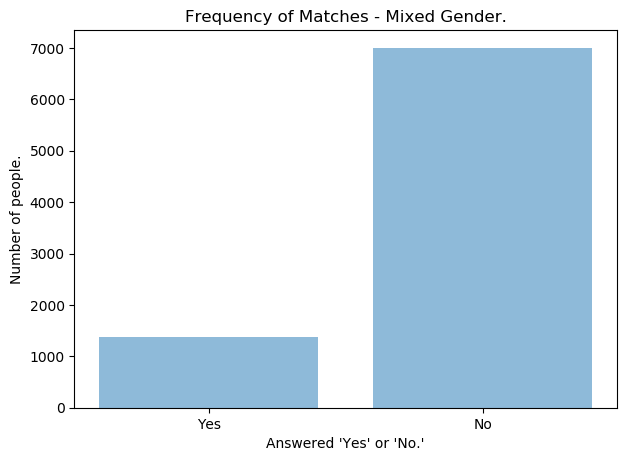

In [132]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
buckets = ('Yes', 'No')
y_pos = np.arange(len(buckets))
values = [1380, 6998]
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, buckets)
plt.ylabel('Number of people.')
plt.xlabel("Answered 'Yes' or 'No.'")
plt.title('Frequency of Matches - Mixed Gender.')
plt.show()

In [133]:
# Wow! A dramatcially larger number of 'No's', your chances are not good. 

In [134]:
# I would love to see the split of yes and no's between men and women.

In [135]:
males.groupby('match (yes/no)').count()

,gender,age,partner_age,age_difference,race,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match
match (yes/no),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,3504,3482,3439,3504,3489,3460,3489,3489,3445,3445,3445,3445,3445,3423,3504,3504,3504,3504,3504,3504,3395,3368,3351,3318,3177,2984,3479,3479,3479,3479,3479,3404,3363,3361,3345,3187,3067,3504,3504,3400,3365,3504,3504,3504
yes,690,682,680,690,685,681,685,685,680,680,680,680,680,680,690,690,690,690,690,690,688,686,686,683,645,624,677,677,677,677,677,689,684,684,682,657,636,690,690,689,684,690,690,690


In [136]:
females.groupby('match (yes/no)').count()

,gender,age,partner_age,age_difference,race,partner_race,race_importance,religion_importance,part_pref_attr,part_pref_sinc,part_pref_int,part_pref_funny,part_pref_amb,part_pref_shar,you_pref_attr,you_pref_sinc,you_pref_int,you_pref_funny,you_pref_amb,you_pref_shar,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,how_many_into_me?,how_many_matches?,how_much_like?,prob_like_you?,your_decision?,their_decision?,match
match (yes/no),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,3494,3439,3473,3494,3460,3479,3445,3445,3479,3479,3479,3472,3466,3466,3494,3494,3494,3494,3494,3494,3394,3353,3351,3335,3177,3058,3443,3443,3443,3443,3443,3395,3368,3351,3318,3177,2984,3494,3494,3362,3338,3494,3494,3494
yes,690,680,682,690,681,685,680,680,685,685,685,683,680,680,690,690,690,690,690,690,689,684,684,682,657,636,674,674,674,674,674,688,686,686,683,645,624,690,690,687,682,690,690,690


In [137]:
# The numbers are fairly similiar, not very exciting, so not going to bother plotting. 

In [138]:
# Now lets check out that weird description a bit more. 

In [139]:
pref_attr = baseline_speed_date['you_pref_attr']
pref_sinc = baseline_speed_date['you_pref_sinc']
pref_int = baseline_speed_date['you_pref_int']
pref_funny = baseline_speed_date['you_pref_funny']
pref_amb = baseline_speed_date['you_pref_amb']
pref_shar = baseline_speed_date['you_pref_shar']

In [141]:
pref_attr.describe()

count    8378.000000
mean        3.013058
std         2.690507
min         0.000000
25%         1.300000
50%         1.900000
75%         4.500000
max        10.000000
Name: you_pref_attr, dtype: float64

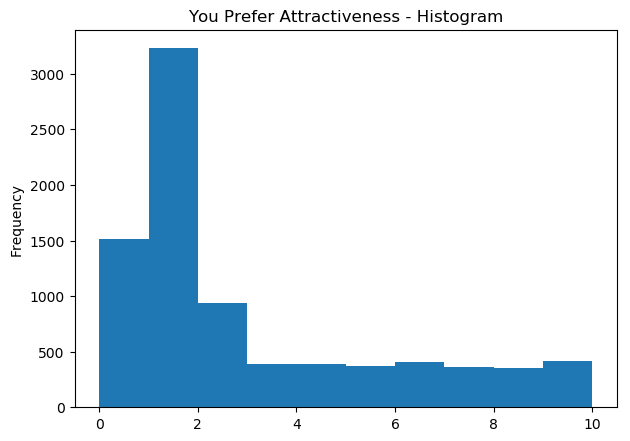

In [142]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(pref_attr)
plt.gca().set(title='You Prefer Attractiveness - Histogram', ylabel='Frequency')
plt.show()

In [143]:
# The above graph represents the distribution of random numbers generated between the transformed range values. 

In [144]:
# Something to note in the report, lets get outputs of  more

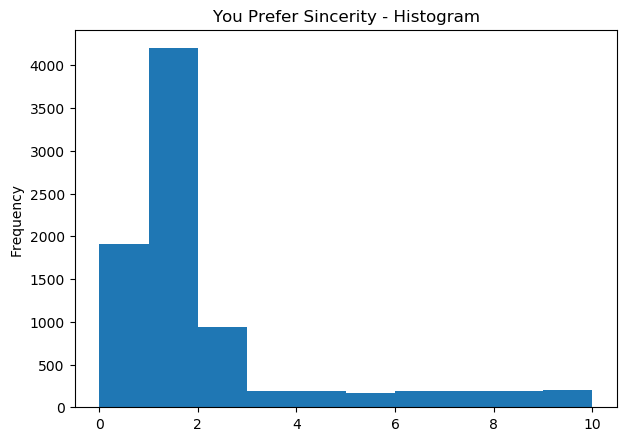

In [145]:
plt.hist(pref_sinc)
plt.gca().set(title='You Prefer Sincerity - Histogram', ylabel='Frequency')
plt.show()

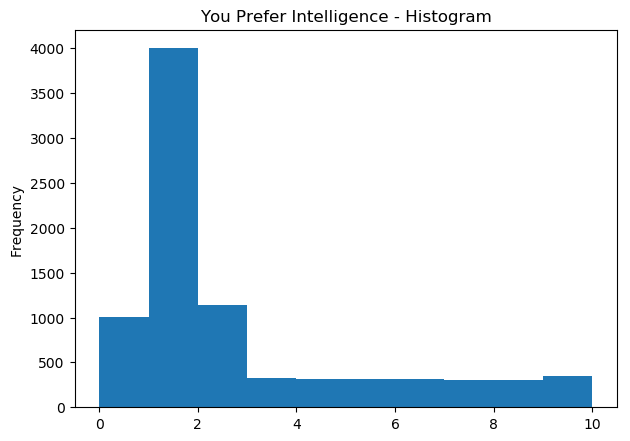

In [146]:
plt.hist(pref_int)
plt.gca().set(title='You Prefer Intelligence - Histogram', ylabel='Frequency')
plt.show()

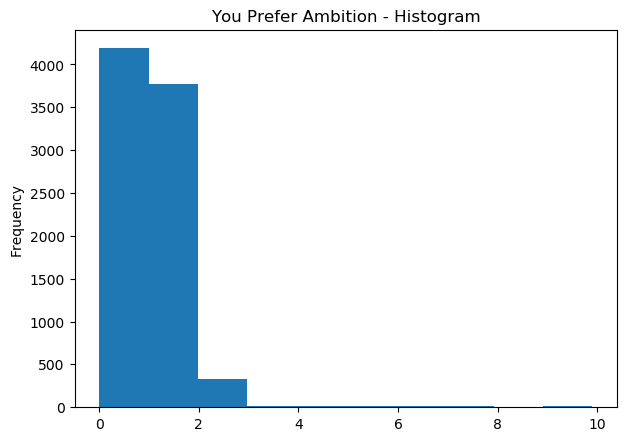

In [147]:
plt.hist(pref_amb)
plt.gca().set(title='You Prefer Ambition - Histogram', ylabel='Frequency')
plt.show()

In [149]:
# Ok, so lets build a heatmap of the subjective attributes to try and uncover some correlations

heatmap_one = baseline_speed_date[['age', 'race', 'religion_importance', 'race_importance',
                                  'match', 'partner_age', 'shared_interests_o',
                                  'attractive', 'attractive_o', 'how_many_into_me?',
                                  'intelligence', 'intelligence_o', 'attractive_partner',
                                  'intelligence_partner', 'shared_interests_partner',
                                  'prob_like_you?', 'how_many_matches?', 'how_much_like?']]

corr = heatmap_one.corr()

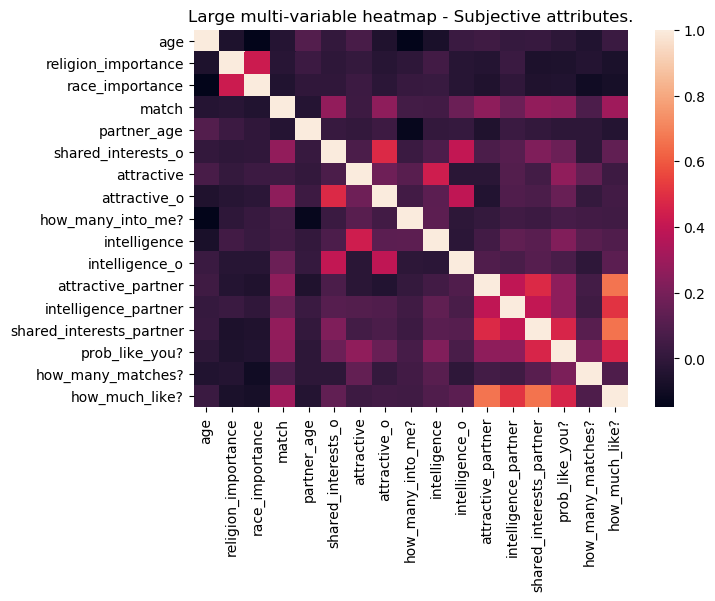

In [150]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
sns.heatmap(corr)
plt.title('Large multi-variable heatmap - Subjective attributes.')
plt.show()

In [151]:
# Wow, some really interesting stuff there :) Lots of correlations between ratings. 


In [152]:
# I liked the heatmap so lets conduct some PCA on these dimensions before clustering.

In [153]:
# The heatmap revealed all the correalated variables so let group them together. 

heatmap_values = heatmap_one[['religion_importance', 'race_importance',
                                  'match', 'partner_age', 'shared_interests_o',
                                  'attractive', 'attractive_o', 'how_many_into_me?',
                                  'intelligence', 'intelligence_o', 'attractive_partner',
                                  'intelligence_partner', 'shared_interests_partner',
                                  'prob_like_you?', 'how_many_matches?', 'how_much_like?']]

# Need to check how many null values we have here. 

heatmap_values.isna().sum()

religion_importance           79
race_importance               79
match                          0
partner_age                  104
shared_interests_o          1076
attractive                   105
attractive_o                 212
how_many_into_me?              0
intelligence                 105
intelligence_o               306
attractive_partner           202
intelligence_partner         296
shared_interests_partner    1067
prob_like_you?               309
how_many_matches?              0
how_much_like?               240
dtype: int64

In [154]:
# ok so quite a few, deffo need to drop some. 

In [155]:
heatmap_values = heatmap_values.dropna()

In [156]:
# And rapid sanity check. 

heatmap_values.isna().sum()

religion_importance         0
race_importance             0
match                       0
partner_age                 0
shared_interests_o          0
attractive                  0
attractive_o                0
how_many_into_me?           0
intelligence                0
intelligence_o              0
attractive_partner          0
intelligence_partner        0
shared_interests_partner    0
prob_like_you?              0
how_many_matches?           0
how_much_like?              0
dtype: int64

In [158]:
# Ok all null values have been removed. The reason for this is that in PCA, every output
# depends, in some degree, on every input.

# So after projection, the entire vector would become NaN.

# We have a relatively small number of NaN values so I'm not too concerned about stripping them out. 

In [159]:
# Before conducting any analysis on my data I will conduct PCA(Principle Component Analysis)

# The aim to reduce the dimensionality from 16 to just 2.

# This 'compression' algorithm aims to remove components that dont descirbe as much of the variance. 

In [160]:
# With the data in such a high dimension it is difficult to visualise, hence reducing the dimensions to 2. 

In [162]:
# First we scale the data so that each feature has a single unit variance. 

scaler = StandardScaler()
scaler.fit(heatmap_values)




/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [163]:
# Then we need to call Scalers transform method

scaled_d = scaler.transform(heatmap_values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
# Now PCA to find the first two principle components. 

# Then apply the rotiation and dimensionality reduction with transform

In [167]:
pca_speed_date = PCA(n_components=2)
pca_speed_date.fit(scaled_d)
x_pca = pca_speed_date.transform(scaled_d)

In [168]:
# Now lets do a quick sanity check to make sure our transformation has occured. 

In [169]:
scaled_d.shape

(6177, 16)

In [170]:
x_pca.shape

(6177, 2)

In [171]:
# Great, so our dimensions have been successfully reduced. Let's plot our new data.

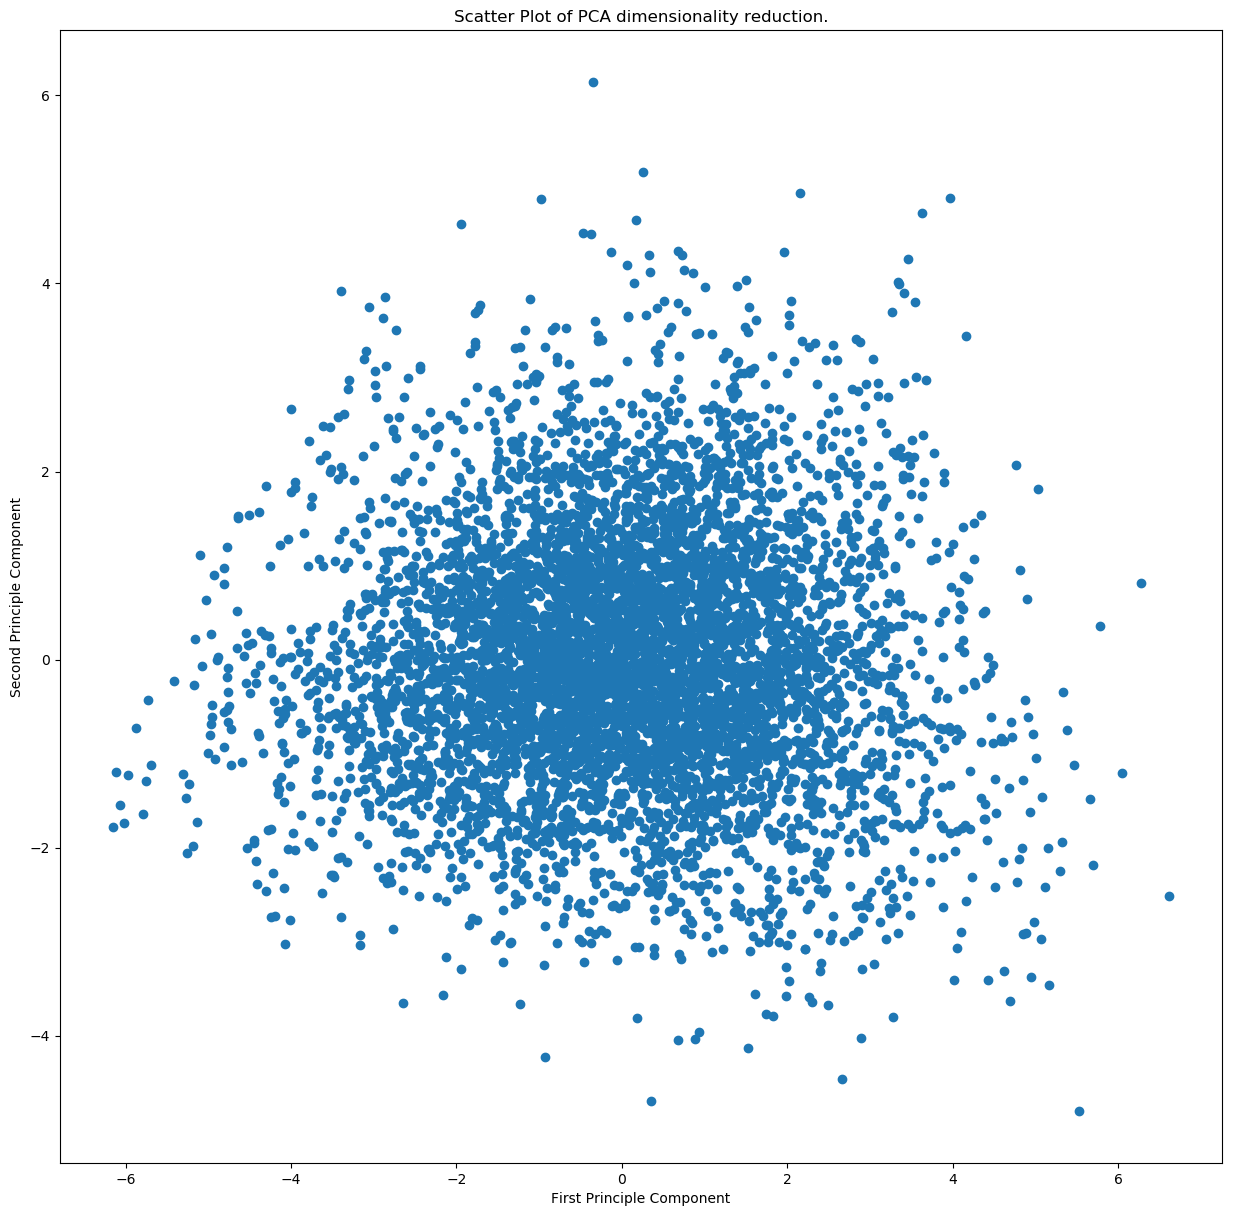

In [172]:
plt.figure(figsize=(15, 15))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.title('Scatter Plot of PCA dimensionality reduction.')
plt.show()

In [173]:
# We can now visualise our 16 dimensions by their first and second principle components.

In [174]:
# However, interpreting these components can be difficult, lets add a colour column to block out the matches.

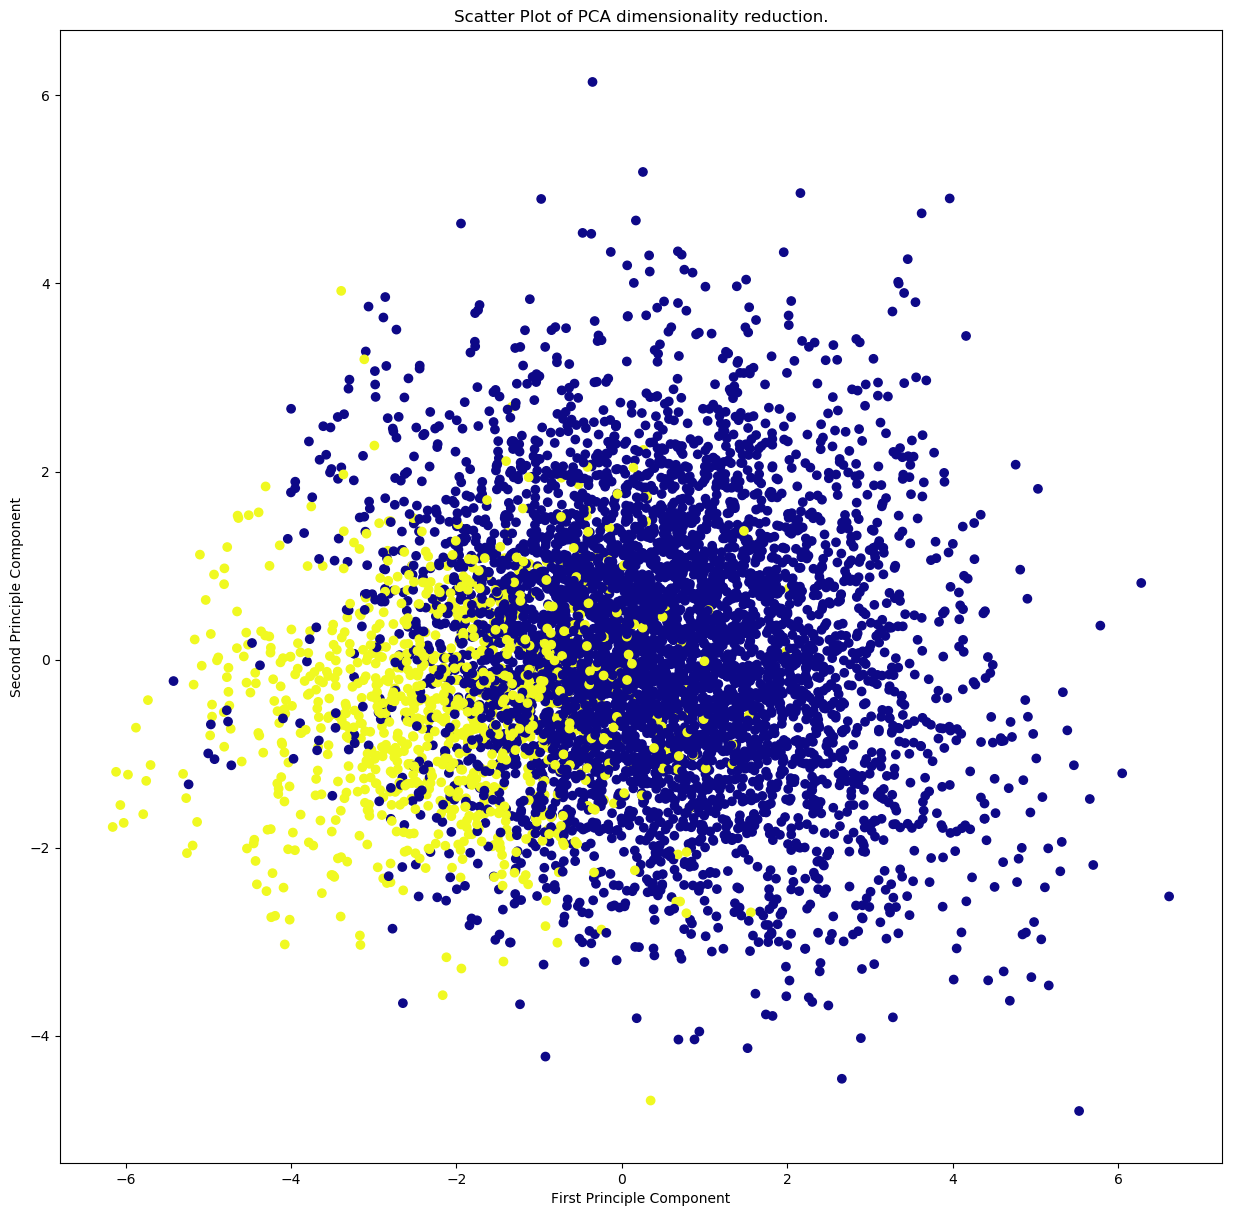

In [175]:
plt.figure(figsize=(15, 15))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=heatmap_values['match'], cmap='plasma')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.title('Scatter Plot of PCA dimensionality reduction.')
plt.show()

In [176]:
# So based on these first two principle components we can see a clear seperation in matching.

In [786]:
# These matches are based off the first two PCA vs the whole 16 dimensional dataset. 

In [177]:
# These components do not relate one to one with our attributes.

# They correspond to combinations of the original features. 

# These components (Eigenvectors) are stored as an attribute of the PCA object.

pca_speed_date.components_

array([[ 0.05264431,  0.05836451, -0.2852246 ,  0.01153379, -0.22974707,
        -0.13264786, -0.1823007 , -0.07251167, -0.15643126, -0.16607052,
        -0.35600605, -0.32966614, -0.41667501, -0.36486994, -0.11485867,
        -0.44278044],
       [-0.06449158, -0.0716908 , -0.13131461, -0.03179497, -0.45532213,
        -0.24043635, -0.54699437, -0.08010958, -0.17248555, -0.38614344,
         0.30960814,  0.14291235,  0.18293871,  0.02052451,  0.02333469,
         0.2685648 ]])

In [178]:
# Each row represents a principle component and each column relates back to the original features.

# We can also view the Eigenvalues for the PCA object. - JUST NEED INFO ON EIGENVALUE

In [179]:
print(f"\nExplained Variance (Eigenvalues) of PCA:\n\n{pca_speed_date.explained_variance_}")


Explained Variance (Eigenvalues) of PCA:

[3.34025518 1.79857661]


In [180]:
# In order to better understand our principle components we can use a heatmap. 

In [181]:
# First lets get all our column names in a list.
col_name = [x for x in heatmap_values.columns]
col_name

['religion_importance',
 'race_importance',
 'match',
 'partner_age',
 'shared_interests_o',
 'attractive',
 'attractive_o',
 'how_many_into_me?',
 'intelligence',
 'intelligence_o',
 'attractive_partner',
 'intelligence_partner',
 'shared_interests_partner',
 'prob_like_you?',
 'how_many_matches?',
 'how_much_like?']

In [182]:
pca_speed_date.components_

array([[ 0.05264431,  0.05836451, -0.2852246 ,  0.01153379, -0.22974707,
        -0.13264786, -0.1823007 , -0.07251167, -0.15643126, -0.16607052,
        -0.35600605, -0.32966614, -0.41667501, -0.36486994, -0.11485867,
        -0.44278044],
       [-0.06449158, -0.0716908 , -0.13131461, -0.03179497, -0.45532213,
        -0.24043635, -0.54699437, -0.08010958, -0.17248555, -0.38614344,
         0.30960814,  0.14291235,  0.18293871,  0.02052451,  0.02333469,
         0.2685648 ]])

In [183]:
pca_heat_df = pd.DataFrame(pca_speed_date.components_)

In [184]:
# Cool, so we can now see each principle components correlation between themselves and the various attributes.

for _ in range(len(col_name)):
    
    pca_heat_df = pca_heat_df.rename(columns={_: col_name[_]})

pca_heat_df

,religion_importance,race_importance,match,partner_age,shared_interests_o,attractive,attractive_o,how_many_into_me?,intelligence,intelligence_o,attractive_partner,intelligence_partner,shared_interests_partner,prob_like_you?,how_many_matches?,how_much_like?
0,0.052644,0.058365,-0.285225,0.011534,-0.229747,-0.132648,-0.182301,-0.072512,-0.156431,-0.166071,-0.356006,-0.329666,-0.416675,-0.364870,-0.114859,-0.442780
1,-0.064492,-0.071691,-0.131315,-0.031795,-0.455322,-0.240436,-0.546994,-0.080110,-0.172486,-0.386143,0.309608,0.142912,0.182939,0.020525,0.023335,0.268565


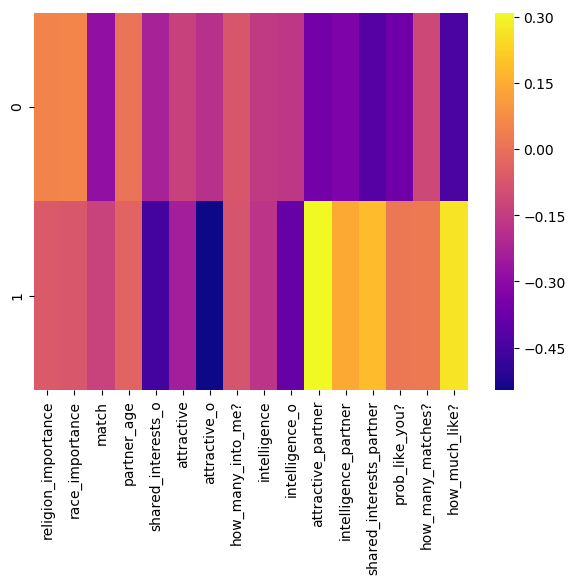

In [185]:
# We can view this relationship better in a heatmap.

sns.heatmap(pca_heat_df, cmap='plasma')
plt.show()

In [186]:
# Each PCA shows as a row, the hotter looking the colour the more correlated to a specific feature. 

In [187]:
# The PCA is a combination of all these subjective ratings. 

In [188]:
# I can now use my x_pca in a classification algorithm, and use my pca object in an unsupervised method. 

In [189]:
# First lets do K-Means. We will use our PCA

In [344]:
kmeans_pca = KMeans(n_clusters=8)
kmeans_pca.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [345]:
# Lets measure how well our K means model has handled matching people into similar groups.

In [350]:
# Cool, let's have a look at the scores.

c = metrics.completeness_score(heatmap_values['match'], kmeans_pca.labels_)
h = metrics.homogeneity_score(heatmap_values['match'], kmeans_pca.labels_)

print('After implementing the arbitary value of 8 clusters.\n')
print(f"Completeness Score is {c}.")
print(f"Homogeneity Score is {h}.")

After implementing the arbitary value of 8 clusters.

Completeness Score is 0.08387168945458685.
Homogeneity Score is 0.36351643756649077.


In [347]:
# So not a great homogeneity score but an excellent completeness score. 

In [348]:
# let's visualise the clustering of our two principle components. 

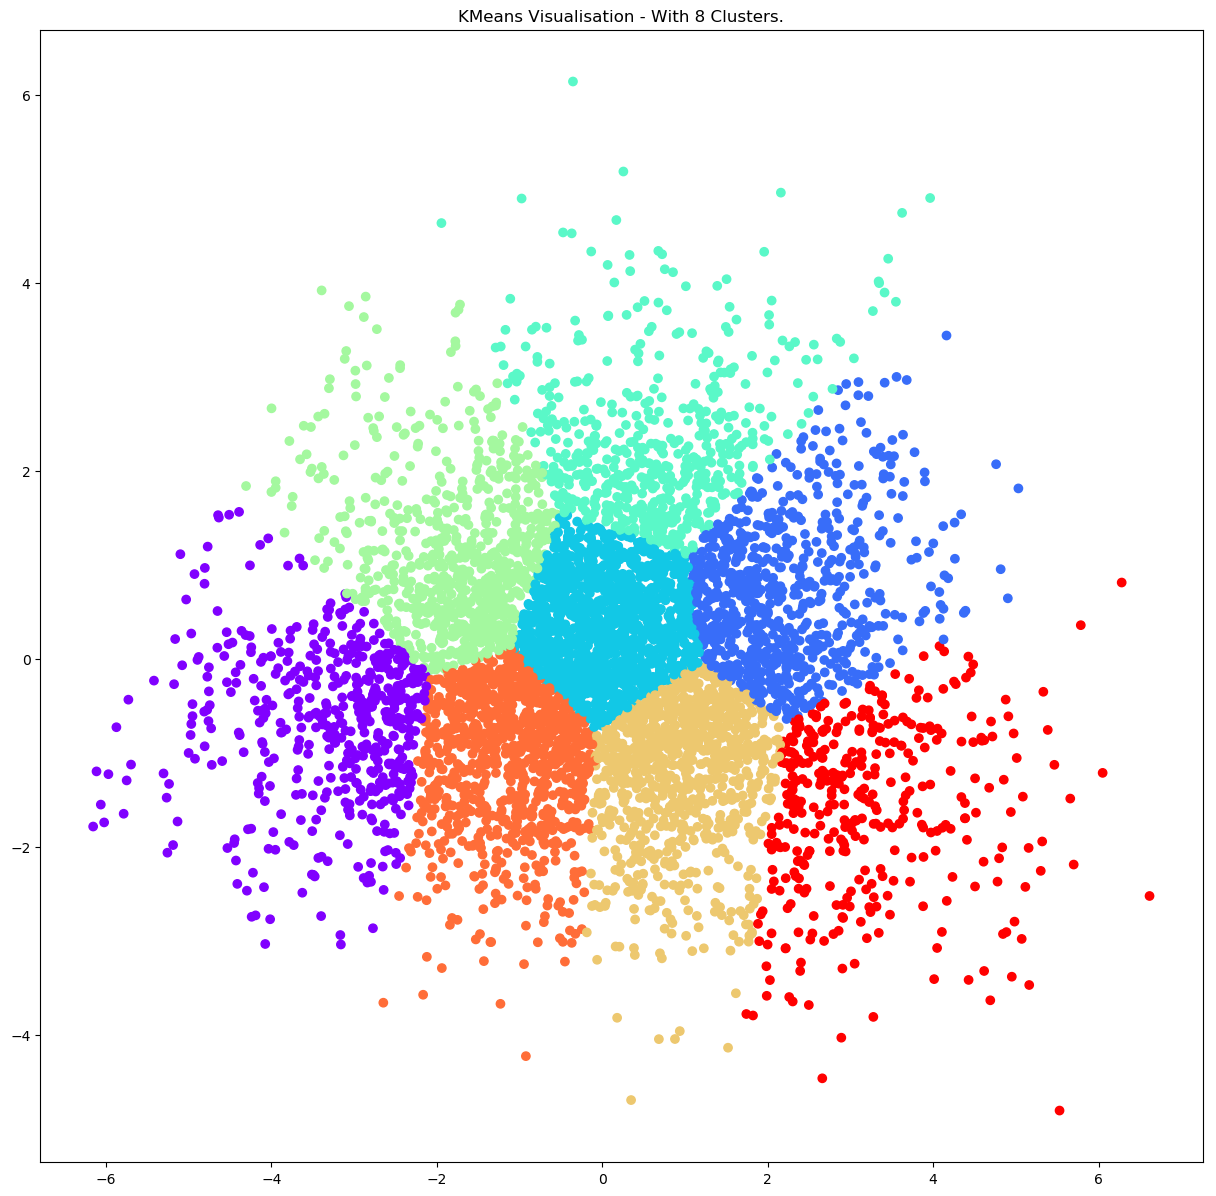

In [351]:

plt.figure(figsize=(15, 15))
plt.title('KMeans Visualisation - With 8 Clusters.')
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_pca.labels_, cmap='rainbow')
plt.show()


In [207]:
# So my plot looks like three main clusters with a lot of noise between and behind them 
    
# Cool, lets run the elbow method to see what the optimum amount of clusters might be?

In [208]:
# So now for each K value we initialise K means and use the intertia attribute to identify
# the sum of squared distances. 

# x_pca is our already transformed and scaled data. 

In [209]:
sum_square_dist = []
K = range(1, 16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_pca)
    sum_square_dist.append(km.inertia_)



In [212]:
# So, as K increases, the sum of squared distance tends towards zero. 
# Lets plot the above and see if we get an arm, if so, the elbow will be the optimum number of clusters.

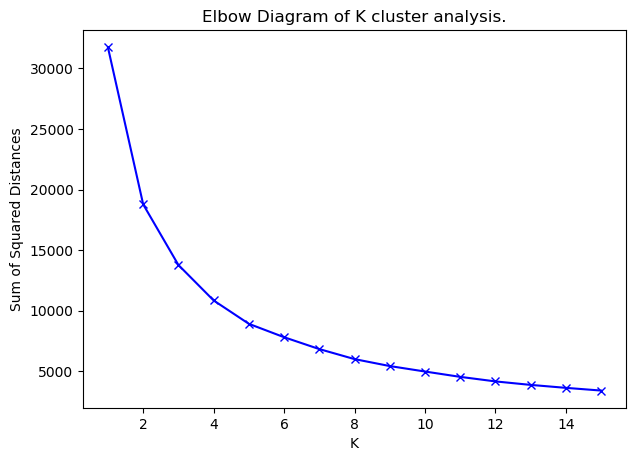

In [213]:
plt.plot(K, sum_square_dist, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Diagram of K cluster analysis.')
plt.show()

In [352]:
# Great! So we have managed to draw some information. The elbow bend appears to be at around 4.
# This indicates that the optimum number of K clusters is four! 

In [353]:
# Let's run our clustering again with 4 clusters and check the scores out! 

In [372]:
kmeans_e = KMeans(n_clusters=5, max_iter=500)
kmeans_e.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [373]:
# Let's check the scores before plotting.

In [374]:
c = metrics.completeness_score(heatmap_values['match'], kmeans_e.labels_)
h = metrics.homogeneity_score(heatmap_values['match'], kmeans_e.labels_)

print('K-means scoring after implemeting with n_clusters = 5.\n')
print(f"Completeness Score is {c}.")
print(f"Homogeneity Score is {h}.")

K-means scoring after implemeting with n_clusters = 5.

Completeness Score is 0.09964872748981951.
Homogeneity Score is 0.3386565963476357.


In [366]:
# Well both scores are up, but its still not much better, I'll iterate over the first ten to see which 
# will provide me with the best score. 

In [367]:
for _ in range(1, 13):
    kmeans_e = KMeans(n_clusters=_, max_iter=500)
    kmeans_e.fit(x_pca)
    c = metrics.completeness_score(heatmap_values['match'], kmeans_e.labels_)
    h = metrics.homogeneity_score(heatmap_values['match'], kmeans_e.labels_)
    print('---------')
    print(f"Once implemeting n_clusters to equal {_}.\n")
    print(f"Completeness Score is {c}.")
    print(f"Homogeneity Score is {h}.")
    print('---------\n')

---------
Once implemeting n_clusters to equal 1.

Completeness Score is 1.0.
Homogeneity Score is 0.0.
---------

---------
Once implemeting n_clusters to equal 2.

Completeness Score is 0.14491616312454947.
Homogeneity Score is 0.21623039893772786.
---------

---------
Once implemeting n_clusters to equal 3.

Completeness Score is 0.1156931483203632.
Homogeneity Score is 0.27214556096964376.
---------

---------
Once implemeting n_clusters to equal 4.

Completeness Score is 0.09969143281472136.
Homogeneity Score is 0.29447394042348246.
---------

---------
Once implemeting n_clusters to equal 5.

Completeness Score is 0.10007659988894416.
Homogeneity Score is 0.340214736046635.
---------

---------
Once implemeting n_clusters to equal 6.

Completeness Score is 0.08899443896279766.
Homogeneity Score is 0.33632471032578504.
---------

---------
Once implemeting n_clusters to equal 7.

Completeness Score is 0.08569454593408495.
Homogeneity Score is 0.35103913666929243.
---------

------

In [368]:
# As per our diagram the homogeneity flattens out as K increases. 

# If anygting I'd say 5 provides the best gains. as Completness is up by 10 % and homoegenity down by only 1%


In [369]:
# Fianlly lets view the clustering with what we can surmise is an optimum 5 clusters

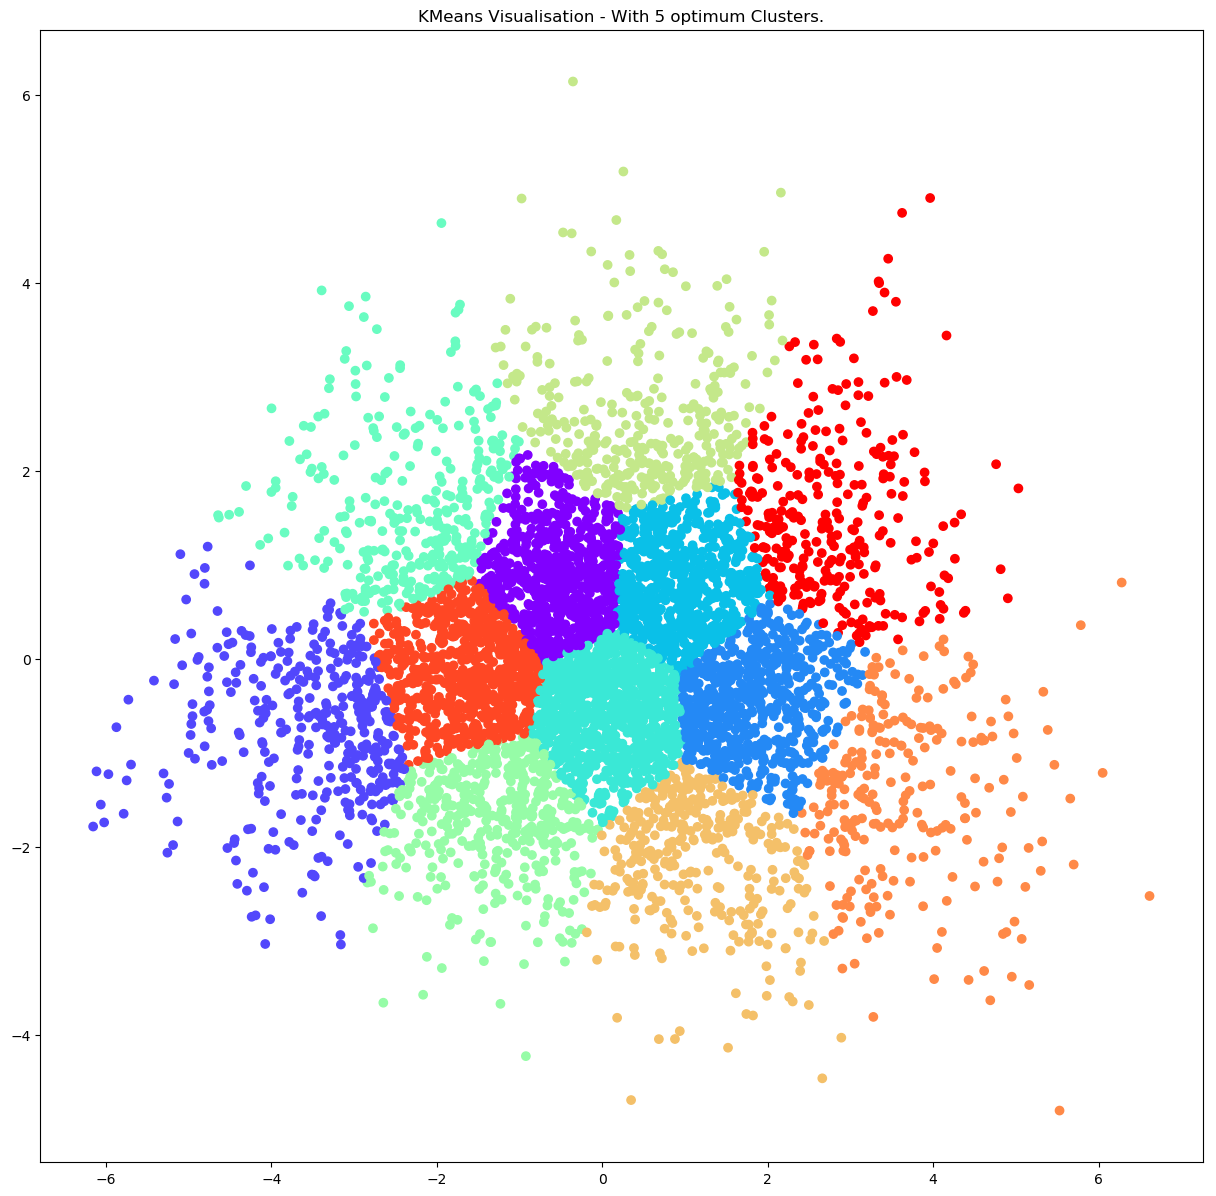

In [370]:

plt.figure(figsize=(15, 15))
plt.title('KMeans Visualisation - With 5 optimum Clusters.')
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_e.labels_, cmap='rainbow')
plt.show()



In [224]:
# That looks good!

# We can clearly see the algorithm at work here, and although the scores weren't fantastic its grouping well.

# K-Means has adjusted our data into 5 distinct segments, effecivly finding similiarity in the way users rate. 

# However the level of data outwith our clustering may make it unsuitable.

# By increasing the number of attributes rated I would hope would lead to more matches for potential users. 

# With more data points and possibly more subjective ratings we could possibly increase its accuracy. 

In [225]:
# Ok so with clearly effective clustering lets move on to Support Vector Machines as our supervised. 

In [226]:
# We want to classify our data points as matches so we'll use SVM. 

In [991]:
# I already have my data scaled and encompassed by my two prinicple comonents so we can use that as X. 

# And, as in our initial plotting of PCA, we shall use the heatmap 'match' column as our target.

# SVM is a binary linear classifier so our 0's and 1's in this column will suit us well. 

X = x_pca
Y = heatmap_values['match']
X_svm_train, X_svm_test, Y_svm_train, Y_svm_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3)


In [992]:
# Now that our data is split into training and test we can initiate our SVM model.

In [993]:
svm_model = SVC()

In [994]:
svm_model.fit(X_svm_train, Y_svm_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [995]:
# Quuite a few parameters. 

In [996]:
# Lets go ahead and predict. 

In [997]:
predictions = svm_model.predict(X_svm_test)

In [998]:
# Now we have made some predictions on our test data lets have a look at the scores. 

In [1019]:
print(f" Confusion Matrix for default parameters:\n\n{confusion_matrix(Y_svm_test, predictions)}")
print('\n')
print(f"Classification Report:\n\n{classification_report(Y_svm_test, predictions)}")

 Confusion Matrix for default parameters:

[[1483   64]
 [ 138  169]]


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1547
           1       0.73      0.55      0.63       307

   micro avg       0.89      0.89      0.89      1854
   macro avg       0.82      0.75      0.78      1854
weighted avg       0.88      0.89      0.88      1854



In [1000]:
# So we want to improve our SVM model we can use a gridsearch.

In [1001]:
# Here we create a list of parameters and try different combinations to produce a best result. 

In [1002]:
 param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [1003]:
# So this is my parameter grid, I am going to adjust the C value and the gamma value. 

In [1004]:
# The C argument will effect the bias and variance. A large C value means low bias and high variance, and vice versa.

In [1005]:
# The gamma argument is the free parameter from the raidal bias function.

In [1006]:
# It's effect on the model again adjust the bias and variance.

In [1007]:
# Now we just feed our param grid to gridsearchcv

In [1008]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [1009]:
# Now we fit the model to gridsearch

In [1010]:
grid.fit(X_svm_train, Y_svm_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.878556557945871, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8889659958362248, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8771686328938237, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.1, score=0.8778625954198473, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8889659958362248, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8750867453157529, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8577376821651631, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8667591950034698, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8639833448993754, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.8202637057598889, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ........ C=1000, gamma=1, score=0.8868841082581541, total=   8.9s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.8778625954198473, total=  11.4s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8827203331020125, total=   1.7s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8896599583622484, total=   1.9s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8834142956280361, total=   2.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ...... C=1000, gamma=0.01, score=0.878556557945871, total=   0.6s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.8910478834142956, total=   0.4s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  4.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [1011]:
# Lets get our best parameter setting from the grid object.

In [1012]:
grid.best_params_

{'C': 1000, 'gamma': 0.1}

In [1013]:
# Also can get the best estimator and best score.

In [1014]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1015]:
# Lets run our predictions on this model with optimsed parameters. 

In [1016]:
grid_predictions = grid.predict(X_svm_test)
print(confusion_matrix(Y_svm_test, grid_predictions))
print('\n')
print(classification_report(Y_svm_test, grid_predictions))

[[1484   63]
 [ 142  165]]


              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1547
           1       0.72      0.54      0.62       307

   micro avg       0.89      0.89      0.89      1854
   macro avg       0.82      0.75      0.78      1854
weighted avg       0.88      0.89      0.88      1854



In [1017]:
# So our optimised model does quite well, similar scores to our defalt.

In [977]:
# Our classifier will correctly classify non-matches 91% of the time.

In [978]:
# The classifier will correctly classify matches 73% of the time. 

In [979]:
# I'd consider this analyses a success in terms of informing a modern day dating app to optimse matches for users. 